In [96]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [97]:
# importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


### Step 1 : Reading and Understanding the given Data

In [98]:
dflead=pd.read_csv('Leads.csv') 
dflead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [99]:
dflead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [100]:
# Get the summary of the dataframe 
dflead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [101]:
# Get the count of the row and col of the given dataset
dflead.shape

(9240, 37)

### Step : 2 Cleaning up the given Data

In [102]:
# As We have noted the dataframe contains some Select values it means these are the Missing values
# Replacing Select values with nan values
dflead = dflead.replace('Select',np.nan)

In [103]:
# Checking the missing values
round(100*(dflead.isnull().sum()/len(dflead.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [104]:
# Now we will drop the columns which is having missing values more than 40%
cols=dflead.columns[round((dflead.isnull().sum()/len(dflead))*100)>=40]
dflead=dflead.drop(cols,1)

In [105]:
# After dropping lets check the number missing values again, we can see that all the columns having more than 40% is dropped
round(100*(dflead.isnull().sum()/len(dflead.index)),2).sort_values(ascending = False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

In [106]:
# dropping 'Tags' as these features is derived by sales team, so  we do not need it
dflead.drop('Tags',1,inplace=True)

In [107]:
# Imputing all the missing values of the 'country' feature with the highest data point
# Finding the Labels contains in the Country Variable
dflead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [108]:
# imputing  "India" as its common occurance in Country Column
dflead['Country']=dflead['Country'].replace(np.nan,'India')

In [109]:
# Imputing all the missing values of the 'Specialization' feature with the highest data point
# Finding the Labels contains in the Country Variable
dflead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [110]:
# Imputing  "Finance Management" as its common occurance in Specialization Column
dflead['Specialization']=dflead['Specialization'].replace(np.nan,'Finance Management')

In [111]:
# Imputing all the missing values of the 'What is your current occupation' feature with the highest data point
# Finding the Labels contains in the Country Variable
dflead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [112]:
# Imputing  "Unemployed" as its common occurance in What is your current occupation Column
dflead['What is your current occupation']=dflead['What is your current occupation'].replace(np.nan,'Unemployed')

In [113]:
# Imputing all the missing values of the 'What matters most to you in choosing a course' feature with the highest data point
# Finding the Labels contains in the Country Variable
dflead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [114]:
# Dropping "What matters most to you in choosing a course" as we have almost same value for colums
dflead.drop('What matters most to you in choosing a course',1,inplace=True)

In [115]:
# Imputing all the missing values of the 'Last Activity' feature with the highest data point
# Finding the Labels contains in the Country Variable
dflead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [116]:
# Imputing "Email Opened" as its common occurance in Last Activity Column
dflead['Last Activity']=dflead['Last Activity'].fillna('Email Opened')

In [117]:
# Imputing all the missing values of the 'Lead Source' feature with the highest data point
# Finding the Labels contains in the Country Variable
dflead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [118]:
# imputing  "Google" as its common occurance in Lead Source Column
dflead['Lead Source']=dflead['Lead Source'].replace(np.nan,'Google')

In [119]:
# here we have found that google and Google is same just a typo hence we replaced it google to Google.
dflead['Lead Source']=dflead['Lead Source'].replace('google','Google')

In [120]:
# Now lets just check how many missing values are there in our dataset
round(100*(dflead.isnull().sum()/len(dflead.index)),2).sort_values(ascending = False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
What is your current occupation             0.00
Search                                      0.00
Lead Number                                 0.00
Specialization                              0.00
Country                                     0.00
Last Activity                               0.00
Total Time Spent on 

### Outlier Detection

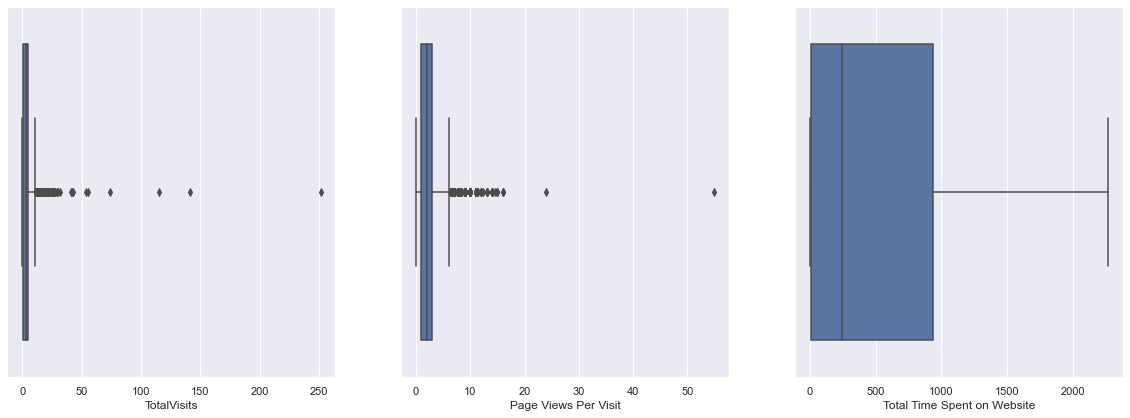

In [121]:
# Finding the outliers
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
sns.boxplot(dflead['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(dflead['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(dflead['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

In [122]:
# Imputing Median to 'TotaVisits' and 'Page Views Per Visit'
dflead['TotalVisits']=dflead['TotalVisits'].fillna(dflead['TotalVisits'].median())
dflead['Page Views Per Visit']=dflead['Page Views Per Visit'].fillna(dflead['Page Views Per Visit'].median())

In [123]:
dflead[pd.isnull(dflead).any(axis=1)==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [124]:
# Lets check the null values
round(100*(dflead.isnull().sum()/len(dflead)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [125]:
# making lead number as index
dflead=dflead.set_index('Lead Number')
dflead.drop(['Prospect ID'],1,inplace=True)

In [126]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 
col_obj=list(dflead.loc[:, dflead.dtypes == np.object].columns)
col_num=list(dflead.loc[:, dflead.dtypes == np.int64].columns)
col_num+=(list(dflead.loc[:, dflead.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_obj,col_num))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']


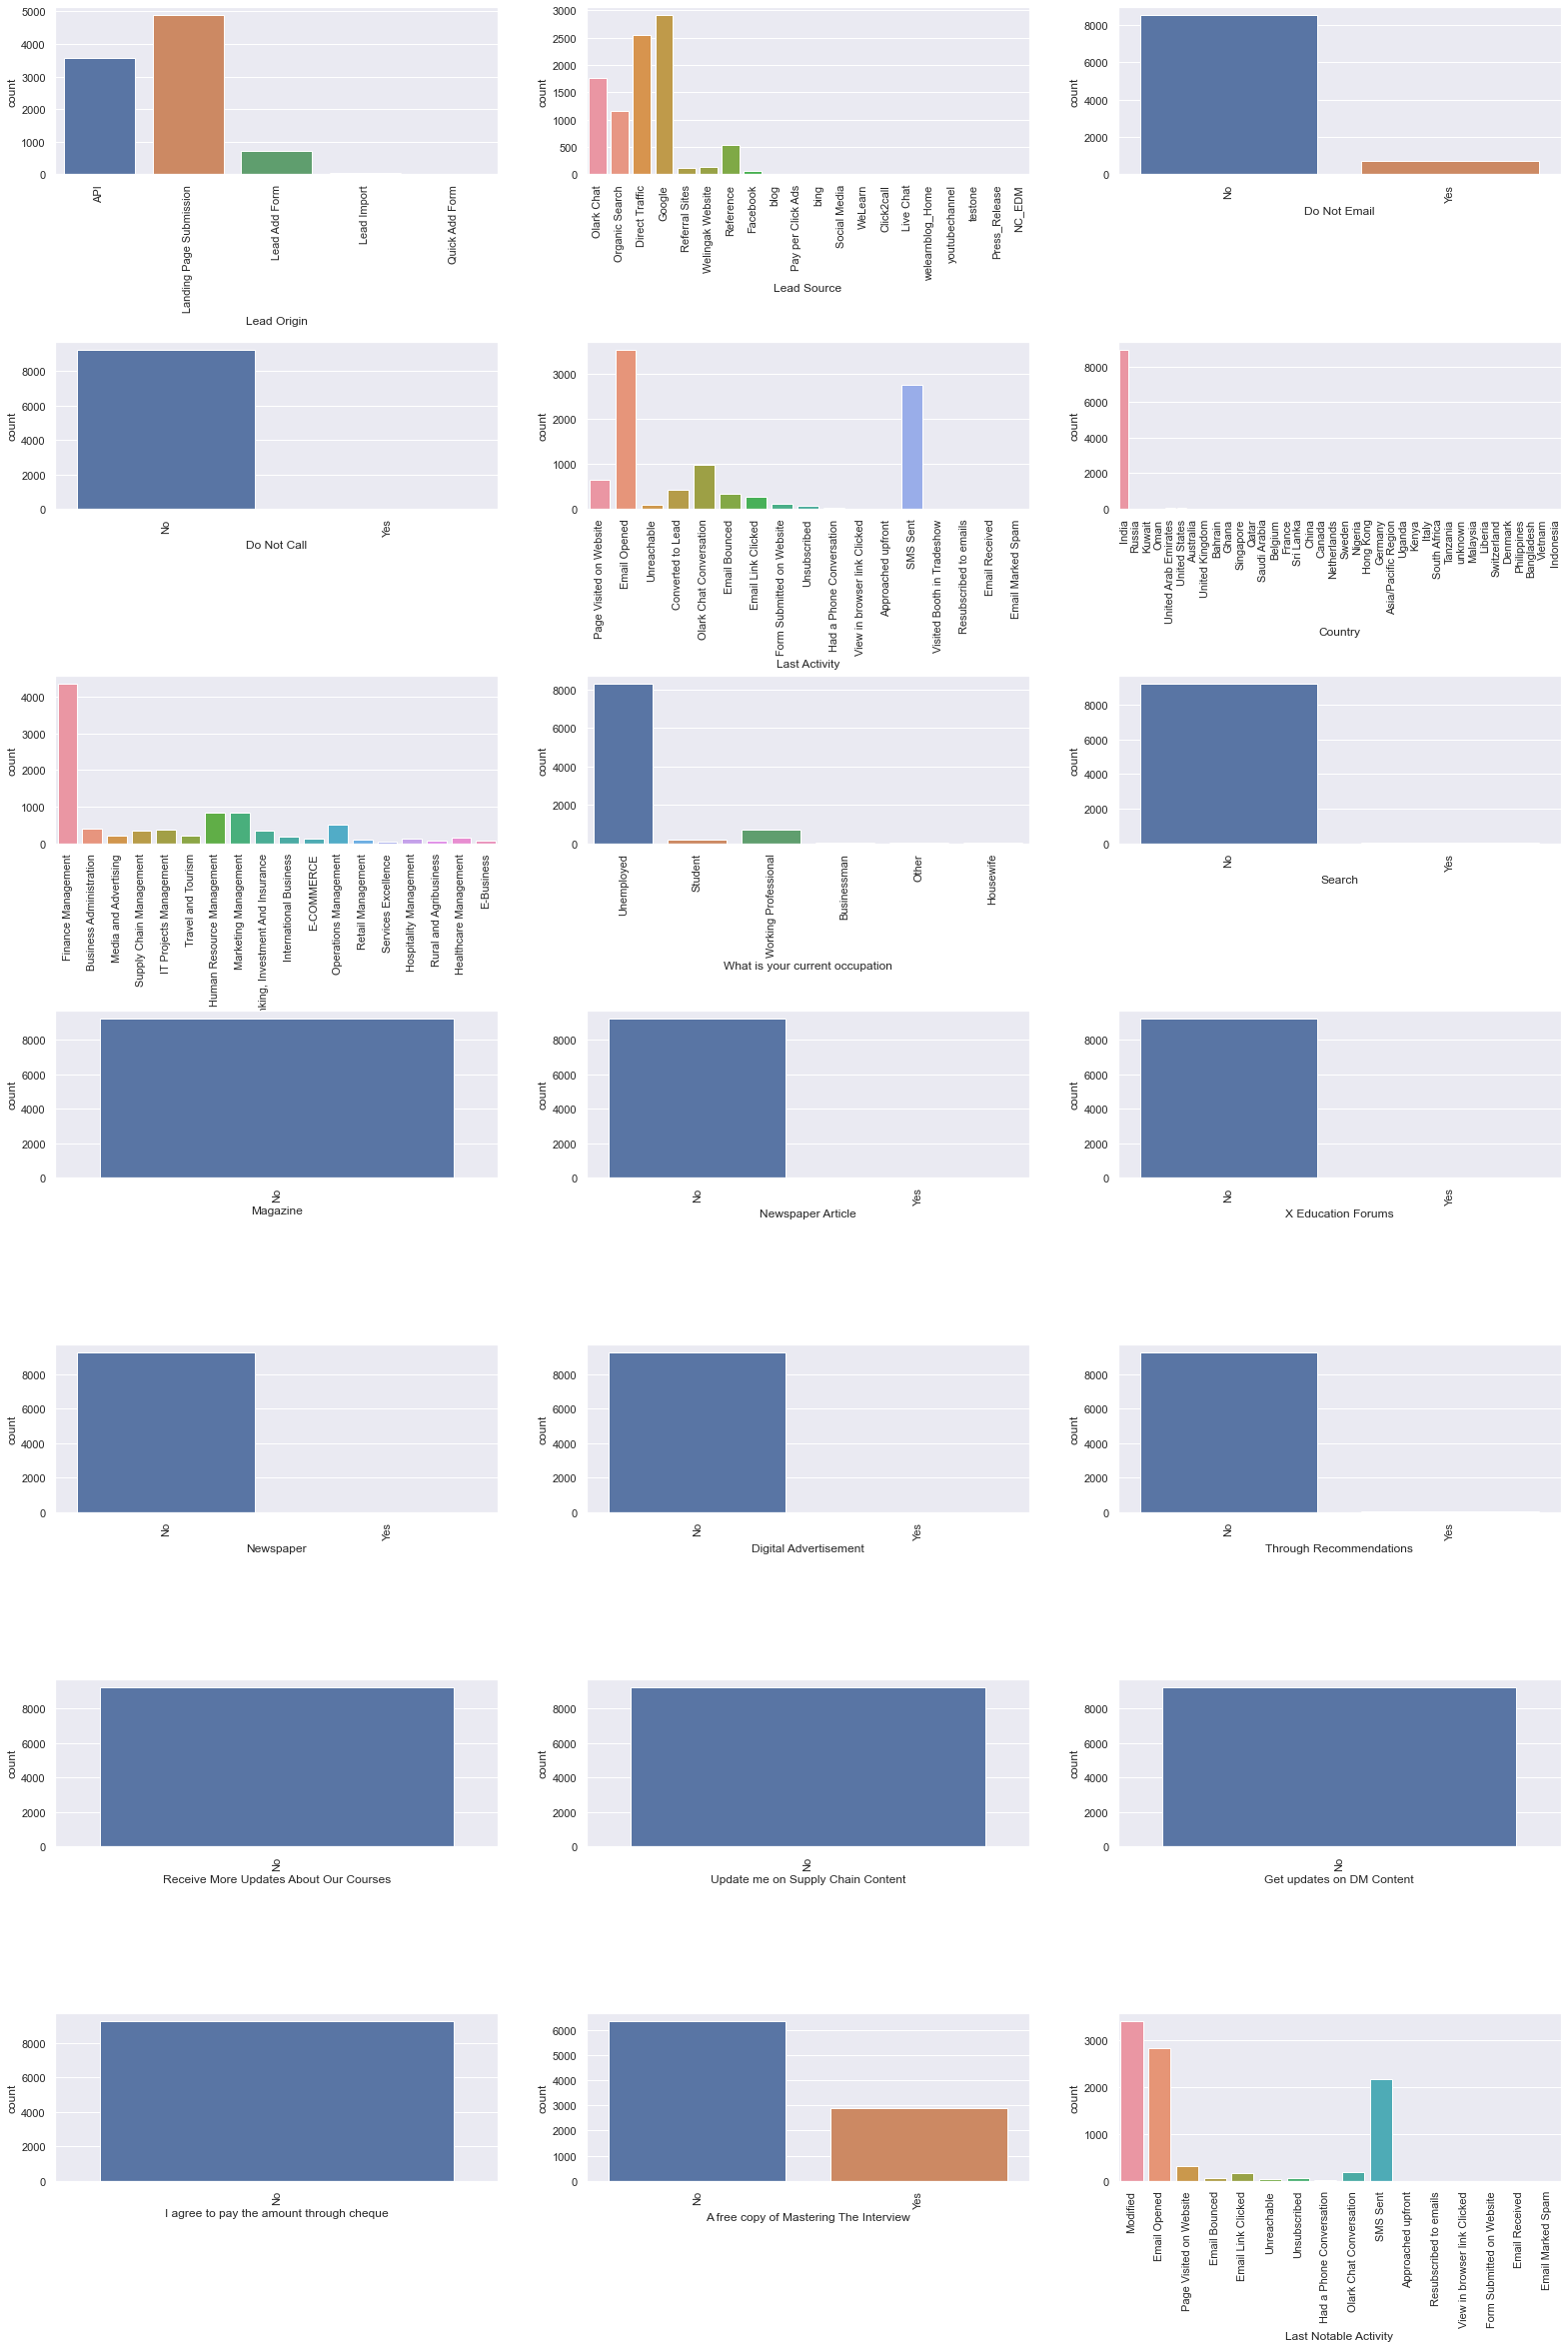

In [127]:
# plotting countplot for object dtype and histogram for number to get data distribution
plt.figure(figsize=(27,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(i[1],data=dflead) 
    plt.xticks(rotation=90)
plt.show()

In [128]:
# Taking care of highly skewed columns  and one value only
dflead=dflead.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',\
                      'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)

In [129]:
# Droping those variables which contains two labels but one is very High and another is very less number of labels.
dflead=dflead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',\
                      'Get updates on DM Content','I agree to pay the amount through cheque', ],1)
col_obj=dflead.loc[:, dflead.dtypes == np.object].columns

In [130]:
# changing categories which are occured less than 1000
col_dict_ls=dict(dflead['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        dflead['Lead Source']=dflead['Lead Source'].replace(i,'Other')

In [131]:
# Changing categories which are occured less than 300
col_dict_la=dict(dflead['Last Activity'].value_counts()<300)
# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        dflead['Last Activity']=dflead['Last Activity'].replace(i,'Other')

In [132]:
# Changing categories which are occured less than 500
col_dict_lna=dict(dflead['Last Notable Activity'].value_counts()<500)
# labels which are occured less like Reference,Reffereal site we can impute to 'Other'

for i in col_dict_lna.keys():
    if col_dict_lna[i]==True:
        dflead['Last Notable Activity']=dflead['Last Notable Activity'].replace(i,'Other')

In [133]:
# Changing categories which are occured less than 350
col_dict_spec=dict(dflead['Specialization'].value_counts()<350)
# labels which are occured less like E-Business,Retail Management we can impute to 'Other'

for i in col_dict_spec.keys():
    if col_dict_spec[i]==True:
        dflead['Specialization']=dflead['Specialization'].replace(i,'Other')

### Step : 3 Exploratory Data Analysis

### Univariate Analysis (Categorical)

In [134]:
# Univariate Analysis (Categorical)
# creating cols which contains only Categorical variable
cols=dflead.loc[:, dflead.dtypes == np.object].columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

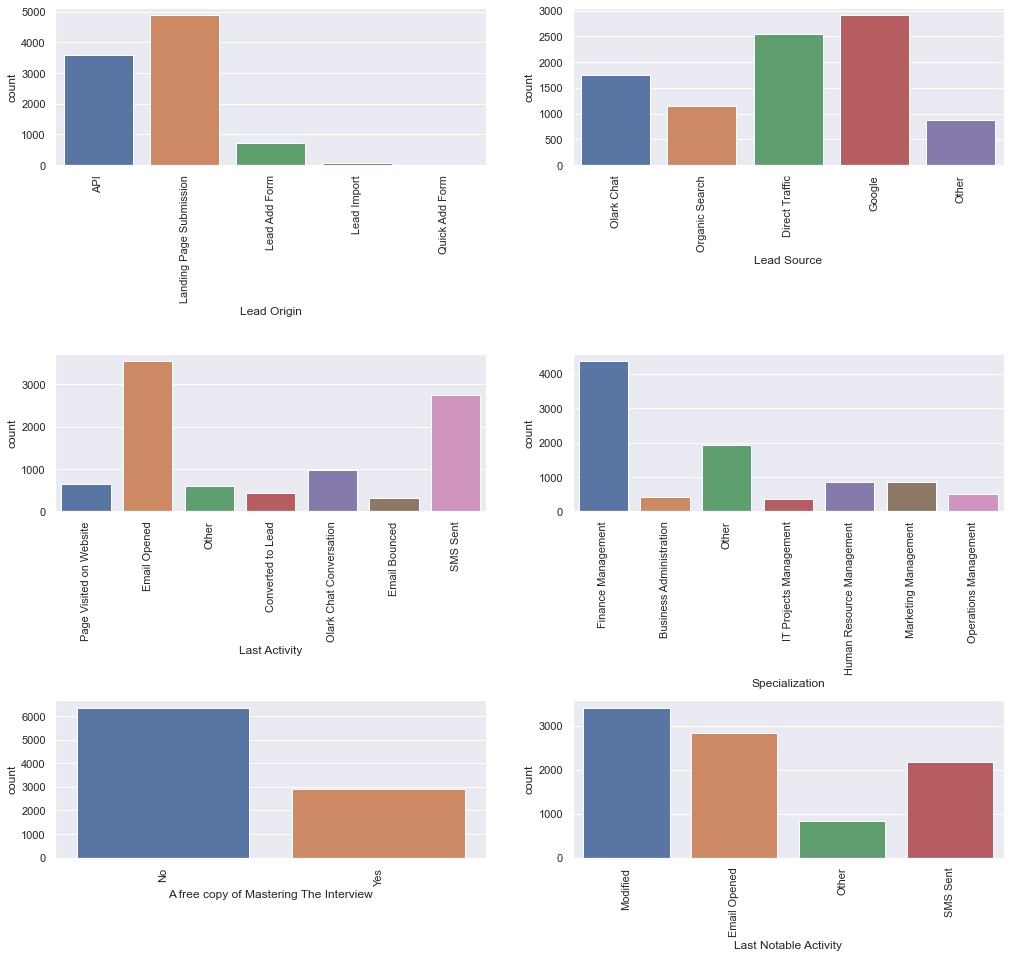

In [135]:
# Plotting them
plt.figure(figsize=(17,22))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=dflead)
    plt.xticks(rotation=90)
plt.show()

## In the above we have conclude the below points
a.In Lead Source we can see that Direct Traffic and Google are the two main source for Leads

b.Email Opened and SMS Sent in Last Activity is high we can see

c.Finance Management Specialization is the most chosen one in the specialization category

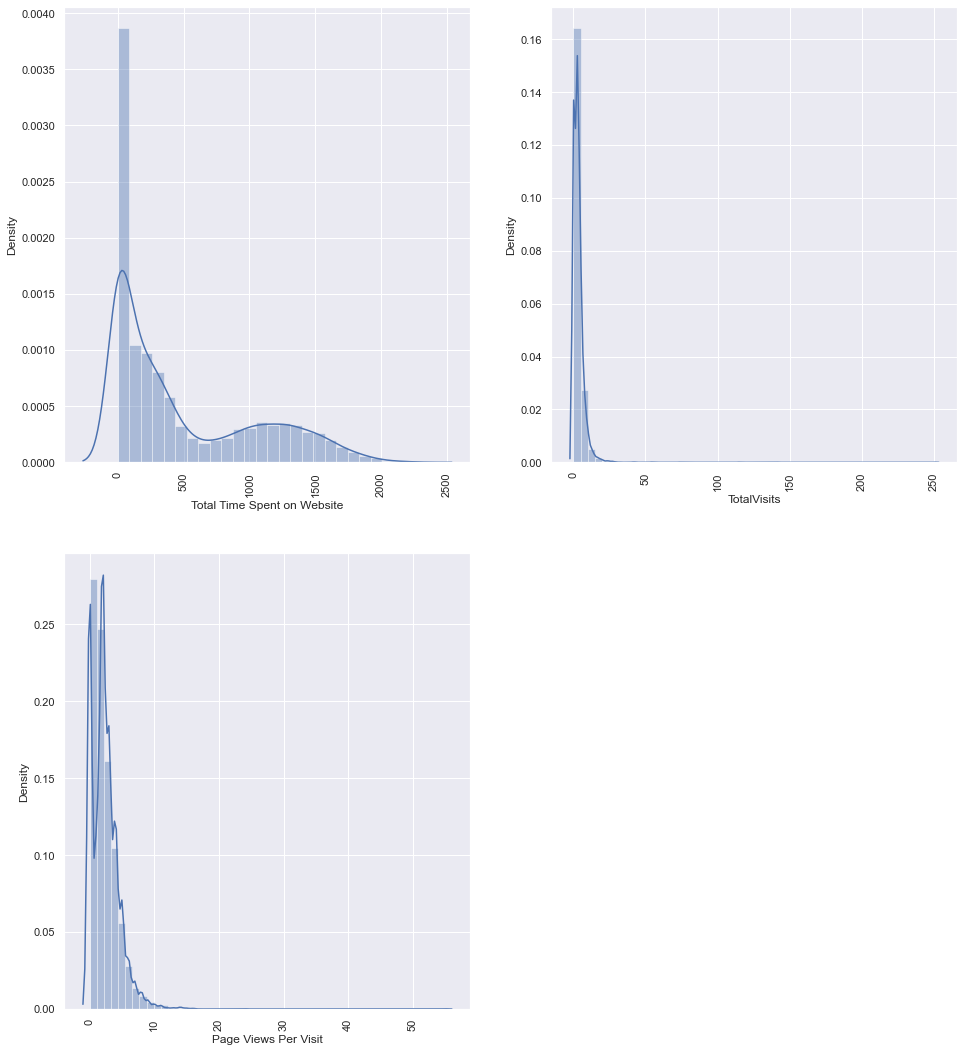

In [136]:
# Univariate Analysis(Contenious data points)
col_num.remove('Converted')

plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(dflead[i[1]])
    
    plt.xticks(rotation=90)
# plt.savefig('coniouus_univar.png',dpi=300,transparent=True)
plt.show()

## Above analysis
a.Continueous Variables are not in Normal distribution

b.Outliers are there in Total Visits and Page Views Per Visit

c.We can see that the total visits have more values is between 0-50 and page views per visits 0-20

### Bivariate Analysis

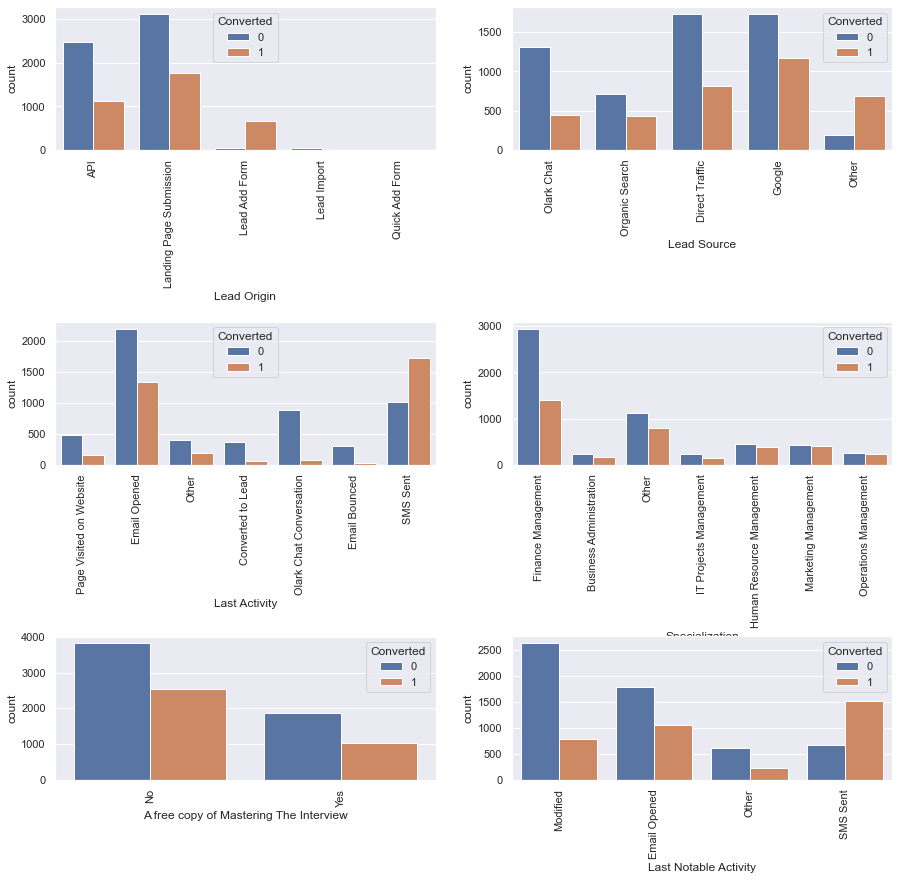

In [137]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = dflead)
    plt.xticks(rotation=90)
# plt.savefig('cate bivar.png',dpi=300,transparent=True)
plt.show()

## Observing Correlation

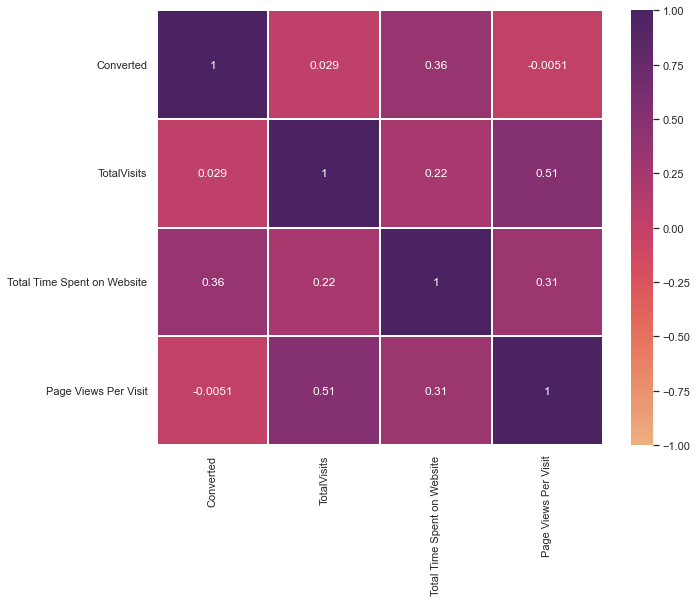

In [138]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(dflead.corr(), annot=True,cmap="flare", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

#### We can observe that the variables are not highly correlated with each other.

### Step : 4 Data Preparation and Features Selection

In [44]:
# Checking the revised and cleaned up dataset
dflead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [45]:
# mapping of columns

dflead['A free copy of Mastering The Interview']=dflead['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [46]:
# Dropping the Last Notable Activity as it is mostly same Last Activity
dflead.drop('Last Notable Activity',1,inplace=True)

In [47]:
# Creating dummies of Categorical Variables
dummies_df=pd.get_dummies(dflead)
dummies_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
660681,1,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
# dropping columns on basis of anal

dummies_df=dummies_df.drop(['A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search','Last Activity_Email Opened','Specialization_Operations Management'],1)

### Splitting the Data into Training and Testing Sets

In [49]:
X=dummies_df.iloc[:,1:]
y=dummies_df[['Converted']]

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

In [51]:
# scaling the Features
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [52]:
# Using rfe for features selection
Logreg=LogisticRegression()

In [53]:
rfe=RFE(Logreg)    # running RFE
rfe=rfe.fit(X_train,y_train)

In [54]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True, False, False, False, False])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other', False, 2),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', False, 4),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 9),
 ('Specialization_IT Projects Management', False, 11),
 ('Specialization_Marketing Management', False, 13),
 ('Specialization_Other', False, 8)]

In [56]:
# After used RFE here RFE selected these variables should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Finance Management'],
      dtype='object')

In [57]:
# After used RFE here RFE selected these variables should not be used for modeling
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Other',
       'Last Activity_Other', 'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management', 'Specialization_Other'],
      dtype='object')

### tep 5: Building a Logistic Regression using statsmodel, for the detailed statistics

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.8
Date:                Mon, 17 Oct 2022   Deviance:                       5855.5
Time:                        13:40:55   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1343      0.183     17.090      0.000       2.775       3.494
Total Time Spent on Website               1.1099      0.038     29.054      0.000       1.035       1.185
Lead Origin_API                          -3.7826      0.193    -19.618      0.000      -4.161      -3.405
Lead Origin_Landing Page Submission      -4.2540      0.187    -22.778      0.000      -4.620      -3.888
Lead Origin_Lead Import                  -3.8017      0.500     -7.605      0.000      -4.782      -2.822
Lead Source_Olark Chat                    0.9961      0.116      8.593      0.000       0.769       1.223
Last Activity_Converted to Lead          -1.0731      0.196     -5.466      0.000      -1.458      -0.688
Last Activity_Email Bounced              -1.8424      0.278     -6.637      0.000      -2.386      -1.298
Last Activity_Olark Chat Conversation    -1.7335      0.167    -10.410      0.000      -2.060      -1.407
Last Activity_Page Visited on Website    -0.5989      0.141     -4.249      0.000      -0.875      -0.323
Last Activity_SMS Sent                    1.1053      0.072     15.328      0.000       0.964       1.247
Specialization_Finance Management        -0.4700      0.084     -5.583      0.000      -0.635      -0.305
=========================================================================================================
"""

In [59]:
# function to calculate vif
def vif_calculator(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [60]:
# Calculate the VIFs for the new model
vif_calculator(X_train[col])

,Features,VIF
1,Lead Origin_API,3.80
10,Specialization_Finance Management,2.79
4,Lead Source_Olark Chat,2.47
2,Lead Origin_Landing Page Submission,1.74
9,Last Activity_SMS Sent,1.53
7,Last Activity_Olark Chat Conversation,1.51
0,Total Time Spent on Website,1.24
8,Last Activity_Page Visited on Website,1.16
5,Last Activity_Converted to Lead,1.13
6,Last Activity_Email Bounced,1.09


___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___

In [61]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
609431    0.137100
631817    0.055193
596164    0.071774
646570    0.124669
643974    0.036293
614268    0.084040
633399    0.200722
615080    0.556724
627916    0.055193
622276    0.449069
dtype: float64

In [62]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13710049, 0.05519347, 0.0717741 , 0.12466852, 0.03629328,
       0.08403977, 0.20072217, 0.5567245 , 0.05519347, 0.44906917])

In [63]:
# Data frame with given convertion rate and probablity of predicted ones
y_train = y_train.values.reshape(-1)


In [64]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
y_train_pred_final = pd.DataFrame({'Converted':y_train, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.137100
1,0,0.055193
2,0,0.071774
3,0,0.124669
4,0,0.036293


In [66]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.137100,0
1,0,0.055193,0
2,0,0.071774,0
3,0,0.124669,0
4,0,0.036293,0


### 6. Model Evaluation

In [67]:
# Creating confusion matrix 
Confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
Confusion

array([[3549,  453],
       [ 905, 1561]], dtype=int64)

In [68]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.79004329004329

In [69]:
# Substituting the value of true positive
TP = Confusion[1,1]
# Substituting the value of true negatives
TN = Confusion[0,0]
# Substituting the value of false positives
FP = Confusion[0,1] 
# Substituting the value of false negatives
FN = Confusion[1,0]

In [70]:
# Calculating the sensitivity
TP/(TP+FN)

0.6330089213300892

In [71]:
# Calculating the specificity
TN/(TN+FP)

0.8868065967016492

### 7. Optimise Cut off (ROC Curve)
The previous cut off was randomely selected. Now to find the optimum one

In [72]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

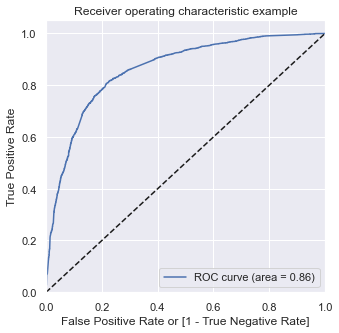

In [74]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We have good area value of 0.86

In [75]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.137100,0,1,1,0,0,0,0,0,0,0,0
1,0,0.055193,0,1,0,0,0,0,0,0,0,0,0
2,0,0.071774,0,1,0,0,0,0,0,0,0,0,0
3,0,0.124669,0,1,1,0,0,0,0,0,0,0,0
4,0,0.036293,0,1,0,0,0,0,0,0,0,0,0


In [76]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.561688,0.974453,0.307346
0.2,0.2,0.697897,0.916869,0.562969
0.3,0.3,0.778293,0.832522,0.744878
0.4,0.4,0.800557,0.754663,0.828836
0.5,0.5,0.790043,0.633009,0.886807
0.6,0.6,0.777675,0.553933,0.915542
0.7,0.7,0.756648,0.454582,0.942779
0.8,0.8,0.730983,0.352798,0.964018
0.9,0.9,0.674706,0.167478,0.987256


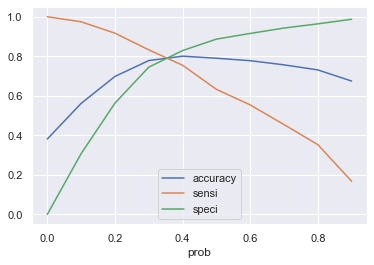

In [77]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph we can see that the optimal cut off is 0.35

In [78]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.137100,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.055193,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.071774,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.124669,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.036293,0,1,0,0,0,0,0,0,0,0,0,0


In [79]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7925170068027211

In [80]:
# Creating confusion matrix 
Confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
Confusion2

array([[3179,  823],
       [ 519, 1947]], dtype=int64)

In [81]:
# Substituting the value of true positive
TP = Confusion2[1,1]
# Substituting the value of true negatives
TN = Confusion2[0,0]
# Substituting the value of false positives
FP = Confusion2[0,1] 
# Substituting the value of false negatives
FN = Confusion2[1,0]

In [82]:
# Calculating the sensitivity
TP/(TP+FN)

0.7895377128953771

In [83]:
# Calculating the specificity
TN/(TN+FP)

0.7943528235882059

### Making Prediction on test set

In [84]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [85]:
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Finance Management'],
      dtype='object')

In [86]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]

In [87]:
X_test

,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management
Lead Number,,,,,,,,,,,
639211,-0.886868,0,0,0,0,0,0,0,0,0,0
590711,1.875759,0,1,0,0,0,0,0,0,1,0
644174,0.995321,0,1,0,0,0,0,0,0,0,0
641392,-0.544986,0,1,0,0,0,0,0,0,1,1
587955,2.283811,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
635799,-0.392426,0,1,0,0,0,0,0,0,0,0
613541,-0.168181,0,1,0,0,0,0,0,1,0,0
589735,-0.886868,1,0,0,1,0,0,0,0,0,0


In [88]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Finance Management
Lead Number,,,,,,,,,,,,
639211,1.0,-0.886868,0,0,0,0,0,0,0,0,0,0
590711,1.0,1.875759,0,1,0,0,0,0,0,0,1,0
644174,1.0,0.995321,0,1,0,0,0,0,0,0,0,0
641392,1.0,-0.544986,0,1,0,0,0,0,0,0,1,1
587955,1.0,2.283811,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
635799,1.0,-0.392426,0,1,0,0,0,0,0,0,0,0
613541,1.0,-0.168181,0,1,0,0,0,0,0,1,0,0
589735,1.0,-0.886868,1,0,0,1,0,0,0,0,0,0


In [89]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.895667
1,1,0.887714
2,1,0.496276
3,0,0.251752
4,1,0.804796


In [90]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.895667,1
1,1,0.887714,1
2,1,0.496276,1
3,0,0.251752,0
4,1,0.804796,1
...,...,...,...
2767,0,0.174337,0
2768,1,0.129524,0
2769,1,0.346022,0
2770,0,0.111435,0


In [91]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7839105339105339

In [92]:
# Creating confusion matrix 
Confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
Confusion2

array([[1319,  358],
       [ 241,  854]], dtype=int64)

In [93]:
# Substituting the value of true positive
TP = Confusion2[1,1]
# Substituting the value of true negatives
TN = Confusion2[0,0]
# Substituting the value of false positives
FP = Confusion2[0,1] 
# Substituting the value of false negatives
FN = Confusion2[1,0]

In [94]:
# Calculating the sensitivity
TP/(TP+FN)

0.7799086757990867

In [95]:
# Calculating the specificity
TN/(TN+FP)

0.7865235539654144

We have a fair score of accuracy,sensitivity and specificity which is 78%,77% and 78%


### Conclusion

Below are the points via which we can a get a understanding between a hot lead and a cold lead

1. The total time spend on the Website.

2. Total number of visits.

3. When the lead source was from the below sites:
  a. Google

  b. Direct traffic

  c. Organic search

  d. Welingak website

4. When the lead origin is Lead add format

5. When their current occupation is as a working professional.